* データの可視化: `matplotlib`と`seaborn`
* 数値配列のハンドリング: `numpy`
* 数値配列からデータフレームを作成: `pandas`
* データセットの利用とt-SNEの実行: `scikit-learn`

* t-SNE(t-Distributed Stochastic Neighbor Embedding): 高次元データの次元を圧縮するアルゴリズム

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib
sns.set(font=["IPAexGothic"])

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

* データセット: MNIST
     - pixel_values: 画像情報（ピクセル値が配列で格納されている）
     - targets: 0~9までのstringsが入っているが、整数型にcastしている

In [3]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [4]:
pixel_values.shape

(70000, 784)

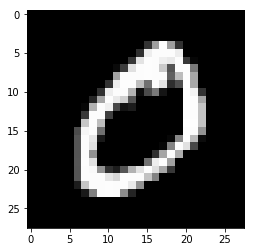

In [5]:
# 784にflattenされているデータを変形する
# 784=28*28にreshapeして、サンプルを可視化する
single_image = pixel_values[1, :].reshape(28, 28)

plt.imshow(single_image, cmap='gray')

* 2次元で可視化するために、2つの要素を取り出す
* サンプルは3000件でtransform後は3000*2になる

In [6]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [7]:
transformed_data.shape

(3000, 2)

* 配列をデータフレームにする
    - x, y: t-SNEで抽出した2要素
    - targets: 実際のラベルの値

In [8]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [10]:
tsne_df.head(10)

,x,y,targets
0,-9.742266,-28.548525,5
1,-25.476608,-66.111008,0
2,-39.992714,32.707321,4
3,46.730042,29.864080,1
4,-14.279590,30.505270,9
5,66.085922,-8.899261,2
6,5.614079,6.056322,1
7,22.788042,-39.631317,3
8,10.402366,10.269567,1
9,-4.167214,43.550537,4


* [sns.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)プロットを使用する
* ラベル毎に色分けするために、色相パラメータの`hue`を使う

Text(0.5, 1.0, 'MNISTのデータセットをt-SNEで次元削減した結果を可視化')

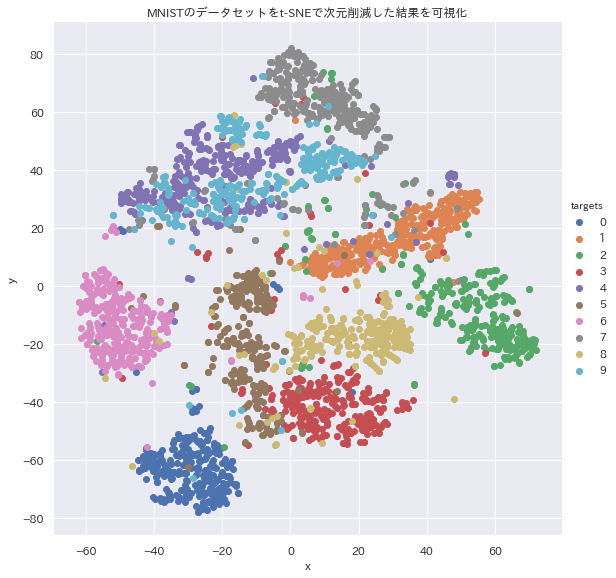

In [29]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)

grid.map(plt.scatter, "x", "y").add_legend()
plt.title("MNISTのデータセットをt-SNEで次元削減した結果を可視化")

* t-SNE以外にも例えば、k-meansなどでもクラスタリングすることが可能であるが、最適なクラスター数をどのように設定するかという問題がある
    - この本ではcross-validationによってその数を見つけることが記載されている

* appendix: k-meansによるクラスタリング結果（クラスター数=10）

In [27]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=10, random_state=42)
pred = kmeans.fit_predict(transformed_data)

kmeans_df = pd.DataFrame(
    np.column_stack((transformed_data, pred)),
    columns=["x", "y", "targets"]
)

kmeans_df.loc[:, "targets"] = kmeans_df.targets.astype(int)

Text(0.5, 1.0, 'MNISTのデータセットをt-SNEで次元削減してk-meansでクラスタリングした結果を可視化')

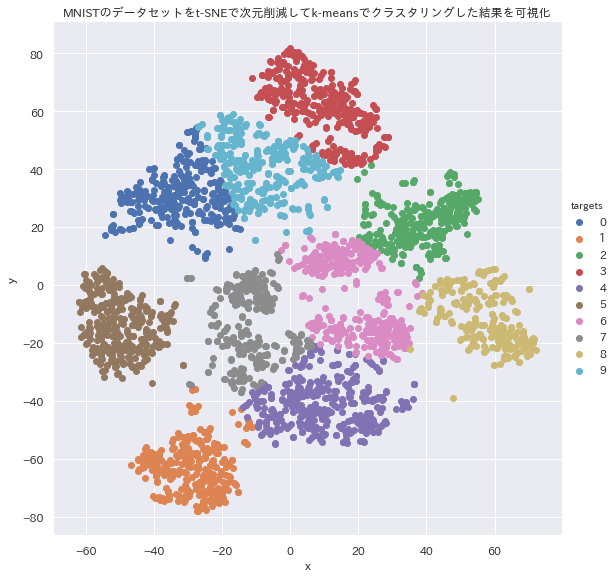

In [30]:
grid = sns.FacetGrid(kmeans_df, hue="targets", height=8)

grid.map(plt.scatter, "x", "y").add_legend()
plt.title("MNISTのデータセットをt-SNEで次元削減してk-meansでクラスタリングした結果を可視化")